### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# identify how many unique values are in each column
for col in data.columns:
    print(col, len(data[col].unique())) # len(data[col].unique()) returns the number of unique values in the column

destination 3
passanger 4
weather 3
temperature 3
time 5
coupon 5
expiration 2
gender 2
age 8
maritalStatus 5
has_children 2
education 6
occupation 25
income 9
car 6
Bar 6
CoffeeHouse 6
CarryAway 6
RestaurantLessThan20 6
Restaurant20To50 6
toCoupon_GEQ5min 1
toCoupon_GEQ15min 2
toCoupon_GEQ25min 2
direction_same 2
direction_opp 2
Y 2


2. Investigate the dataset for missing or problematic data.

In [6]:
missing_data = data.isnull().sum()

print(missing_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [7]:
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

**Vinay's notes:**
The 'car' attribute has 12.5K+ null values out of a total of 12,684 rows. The ones that have values in it are also not consistently defined as vehicle type (e.g., 'Mazda5', ''crossover', 'Car that is too old to install Onstar :D'). This makes the usability of this attribute less useful and also not easy to fill in with a default value. 

We can ignore/drop this column ('car') from our dataset.

In [8]:
# Dropping the car column; 
# Creating a new DataFrame df that is a copy of the original data DataFrame, but with the car column removed.
# Naming the new DataFrame df.
df = data.drop(['car'], axis=1)

In [9]:
df['Bar'].value_counts()
df['CoffeeHouse'].value_counts()
df['CarryAway'].value_counts()
df['RestaurantLessThan20'].value_counts()
df['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [10]:
# Since 'never' is a possible option. Replace nulls with 'never' to make it consistent for 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50'
df['Bar'] = data['Bar'].fillna('never')
df['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
df['CarryAway'] = data['CarryAway'].fillna('never')
df['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')
df['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')

In [11]:
missing_data = df.isnull().sum()

print(missing_data)

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


**Vinay's summary notes on cleanup:**
1. 'car' column was dropped as it was deemed not useful. 
2. \# of visit columns for 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' with null values have been replaced with 'never'.

4. What proportion of the total observations chose to accept the coupon? 



In [12]:
proportion = df['Y'].value_counts(normalize=True)

print(proportion)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


**Vinay's notes:**

About 57% of the population chose to accept the coupon. 

This shows that the dataset is well balanced along the ratio of being close 50-50 split of acceptance vs. not.

5. Use a bar plot to visualize the `coupon` column.

[Text(0, 0, 'Coffee House'),
 Text(1, 0, 'Restaurant(<20)'),
 Text(2, 0, 'Carry out & Take away'),
 Text(3, 0, 'Bar'),
 Text(4, 0, 'Restaurant(20-50)')]

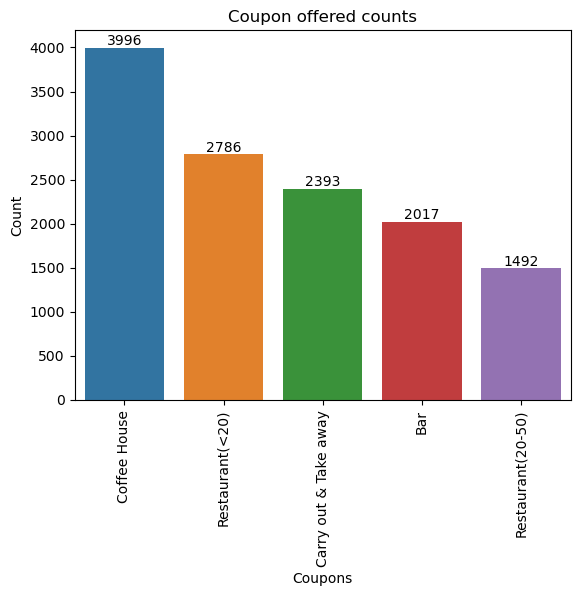

In [13]:
coupon_counts_df = df['coupon'].value_counts().reset_index()
coupon_count_plot = sns.barplot(data=coupon_counts_df, x='coupon', y='count')

coupon_count_plot.set_xlabel('Coupons')
coupon_count_plot.set_ylabel('Count')
coupon_count_plot.set_title('Coupon offered counts')

for i in coupon_count_plot.containers:
    coupon_count_plot.bar_label(i)

coupon_count_plot.set_xticklabels(coupon_count_plot.get_xticklabels(), rotation=90)


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

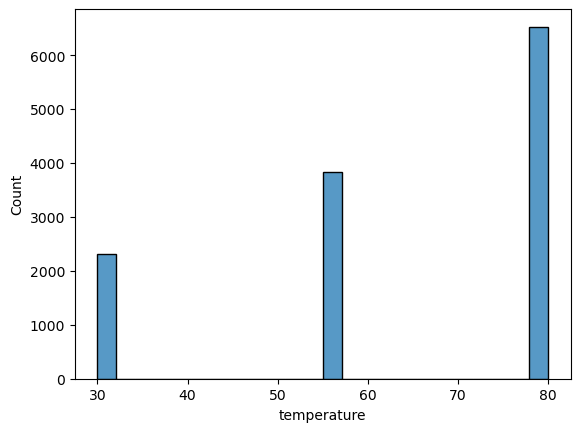

In [14]:
sns.histplot(data=df, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
bar_df = df[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [16]:
bar_accept_proportion_df = bar_df['Y'].value_counts(normalize=True).reset_index()

print(bar_accept_proportion_df)

   Y  proportion
0  0    0.589985
1  1    0.410015


**Vinay's notes:**
About 41% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


**Vinay's notes on approach:**
1. Identify the acceptance of coupons by each type of Bar value.
2. Separate out the Dataframes into 2 groups: one that went to bar 3 times or less, the other is the remaining.
3. Draw subplots of the two sets of groups showing the acceptance for each type.

In [17]:
bar_df.groupby(['Bar', 'Y']).size().unstack()

Y,0,1
Bar,,
1~3,140,257
4~8,33,117
gt8,13,36
less1,317,253
never,687,164


In [18]:
bar_values = ['never', 'less1', '1~3']

# DataFrame where 'Bar' is in bar_values
bar_in_values_df = bar_df[bar_df['Bar'].isin(bar_values)].groupby(['Bar', 'Y']).size().unstack()
bar_in_values_df

Y,0,1
Bar,,
1~3,140,257
less1,317,253
never,687,164


In [19]:
# DataFrame where 'Bar' is NOT in bar_values
bar_not_in_values_df = bar_df[~bar_df['Bar'].isin(bar_values)].groupby(['Bar', 'Y']).size().unstack()
bar_not_in_values_df

Y,0,1
Bar,,
4~8,33,117
gt8,13,36


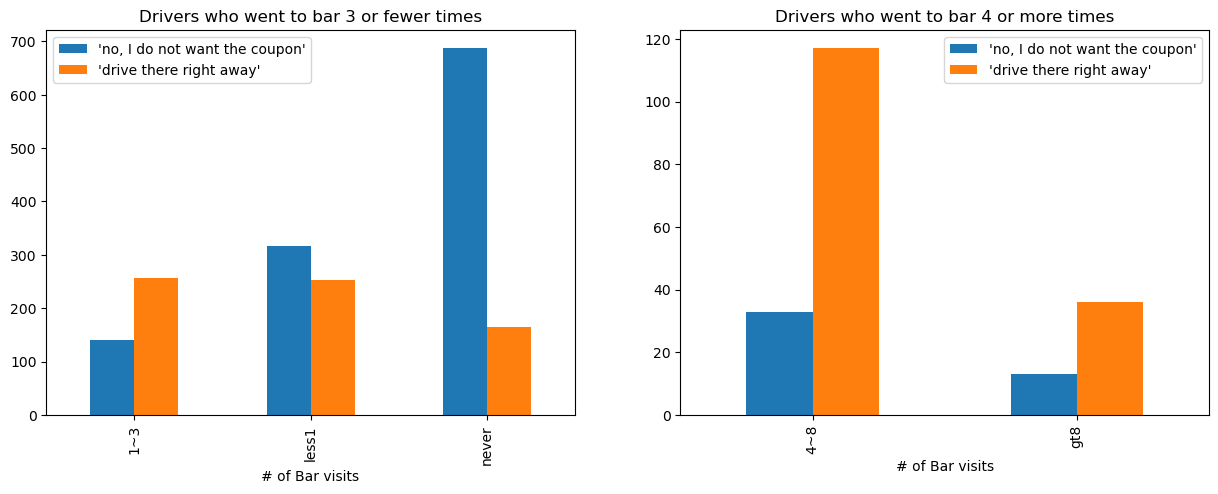

In [20]:
# Plot the bar plot showing subplots of bar_in_values_df and bar_not_in_values_df
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
bar_in_values_df.plot(kind='bar', ax=ax[0], title='Drivers who went to bar 3 or fewer times', xlabel='# of Bar visits')
ax[0].legend(["'no, I do not want the coupon'", "'drive there right away'"])

bar_not_in_values_df.plot(kind='bar', ax=ax[1], title='Drivers who went to bar 4 or more times', xlabel='# of Bar visits')
ax[1].legend(["'no, I do not want the coupon'", "'drive there right away'"])
plt.show()


**Vinay's Analysis:**

a. The total number of coupons offered to drivers in the second group (drivers who visited Bar more than 3 times) was lesser than those in the first group. 

b. However, for those that were offered in the second group, were far more likely to accept the coupon compared to the first group.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


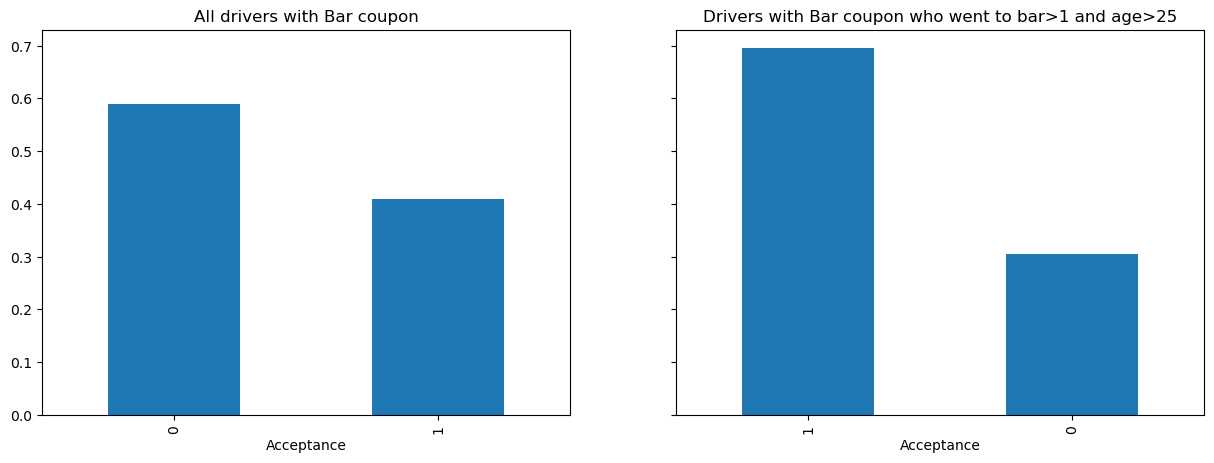

In [21]:
#Define a dataframe that filters for having drivers who visited the bar more than once and are older than 25
# age > 25
# The value_counts() method returned the following distinct values: below21, 21, 26, 31, 36, 41, 46, 50plus
# Since the age column cannot be easily converted to a numerical value, I will use a list to identify the values we want to fitler for.
age_lt_25 = ['below21', '21']

# bar visits greater than 1
bar_values_lt_1 = ['never', 'less1',]
bar_visit_gt_1_df = bar_df[~(bar_df['Bar'].isin(bar_values_lt_1))]
bar_visit_gt_1_age_gt_25_df = bar_visit_gt_1_df[~(bar_visit_gt_1_df['age'].isin(age_lt_25))]

# Plot the bar plot showing subplots of bar_df and bar_visit_gt_1_age_gt_25_df
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
bar_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='All drivers with Bar coupon', xlabel='Acceptance')
bar_visit_gt_1_age_gt_25_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Drivers with Bar coupon who went to bar>1 and age>25', xlabel='Acceptance')

plt.show()

**Vinay's Analysis:**
Acceptance rate of Bar coupon for drivers who have visited bar at least once and age>25 years is <u>significantly higher</u> than the general population who received Bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<Axes: title={'center': 'Drivers w/ Bar coupon who visited bar>1, 0 kids & dont do specified occupations'}, xlabel='Acceptance'>

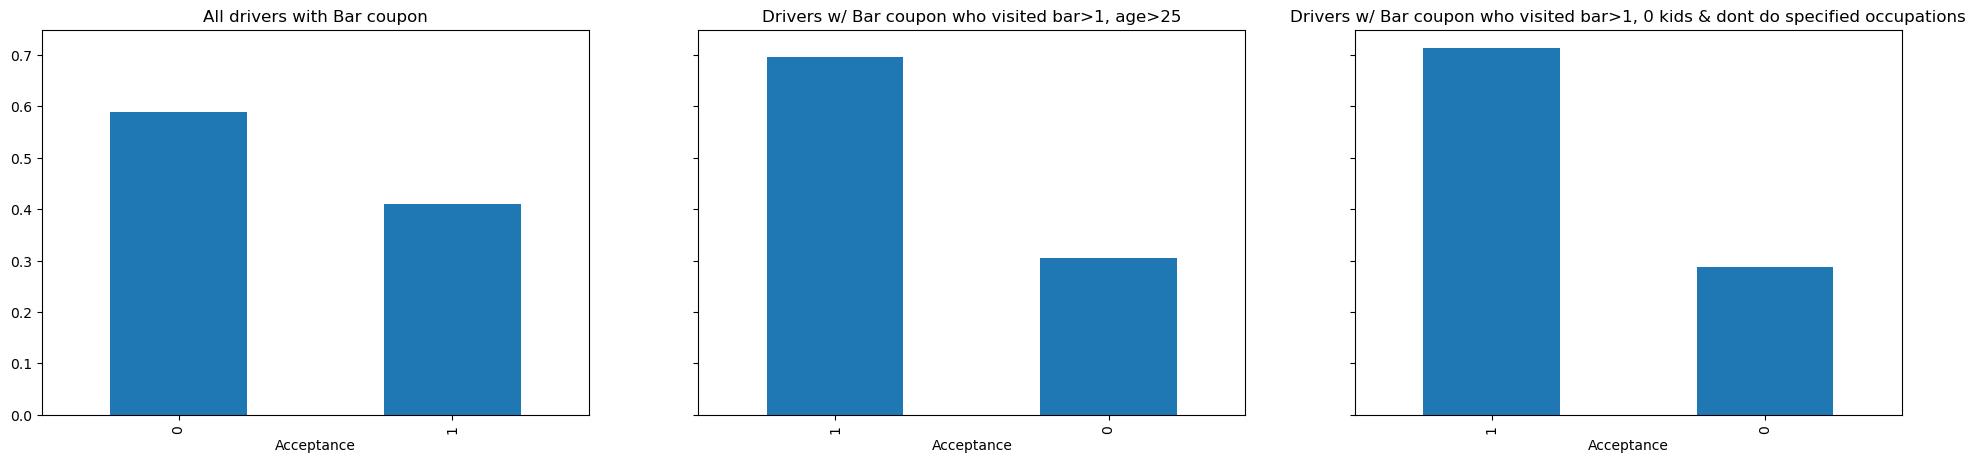

In [22]:
#Define a dataframe that filters for having drivers who:
# 1. visited the bar more than once and 
# 2. have passangers that are not a kid
# 3. occupations other than farming, fishing, forestry.

# bar visits greater than 1
bar_visit_gt_1_df = bar_df[~(bar_df['Bar'].isin(bar_values_lt_1))]
bar_visit_gt_1_df #617 rows

# passangers that are not a kid
# The value_counts() method returned the following distinct values for the passangers column: Kid(s), Alone, Friend(s), Partner
# I will use a list to identify the values we want to fitler out for. (use ~ to filter out)
passanger_kid = ['Kid(s)']
bar_visit_gt_1_p_not_kid_df = bar_visit_gt_1_df[~(bar_visit_gt_1_df['passanger'].isin(passanger_kid))]
bar_visit_gt_1_p_not_kid_df # 569 rows

# occupations other than farming, fishing, forestry
# The value_counts() method returned many distinct values for the occupation column.
# I will use a list to identify the values we want to fitler out for. (use ~ to filter out)
occupation_fff = ['farming', 'fishing', 'forestry']
bar_visit_gt_1_p_not_kid_occ_not_fff_df = bar_visit_gt_1_p_not_kid_df[~(bar_visit_gt_1_p_not_kid_df['occupation'].isin(occupation_fff))]
bar_visit_gt_1_p_not_kid_occ_not_fff_df #569 rows (no additional rows were removed)

#Plot graphs
fig, ax = plt.subplots(1, 3, figsize=(24, 5), sharey=True)
bar_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='All drivers with Bar coupon', xlabel='Acceptance')
bar_visit_gt_1_age_gt_25_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Drivers w/ Bar coupon who visited bar>1, age>25', xlabel='Acceptance')
bar_visit_gt_1_p_not_kid_occ_not_fff_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[2], title='Drivers w/ Bar coupon who visited bar>1, 0 kids & dont do specified occupations', xlabel='Acceptance')

**Vinay's Analysis:**

_'Drivers w/ Bar coupon who visited bar>1, 0 kids & dont do specified occupations'_ have a <u>significantly high Acceptance ratio</u> when compared to _'All drivers with Bar'_ coupon.

However, _'Drivers w/ Bar coupon who visited bar>1, 0 kids & dont do specified occupations'_ have a <u>similar Acceptance ratio</u> (or slightly higher) when compared to _'Drivers w/ Bar coupon who visited bar>1, age>25'_.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



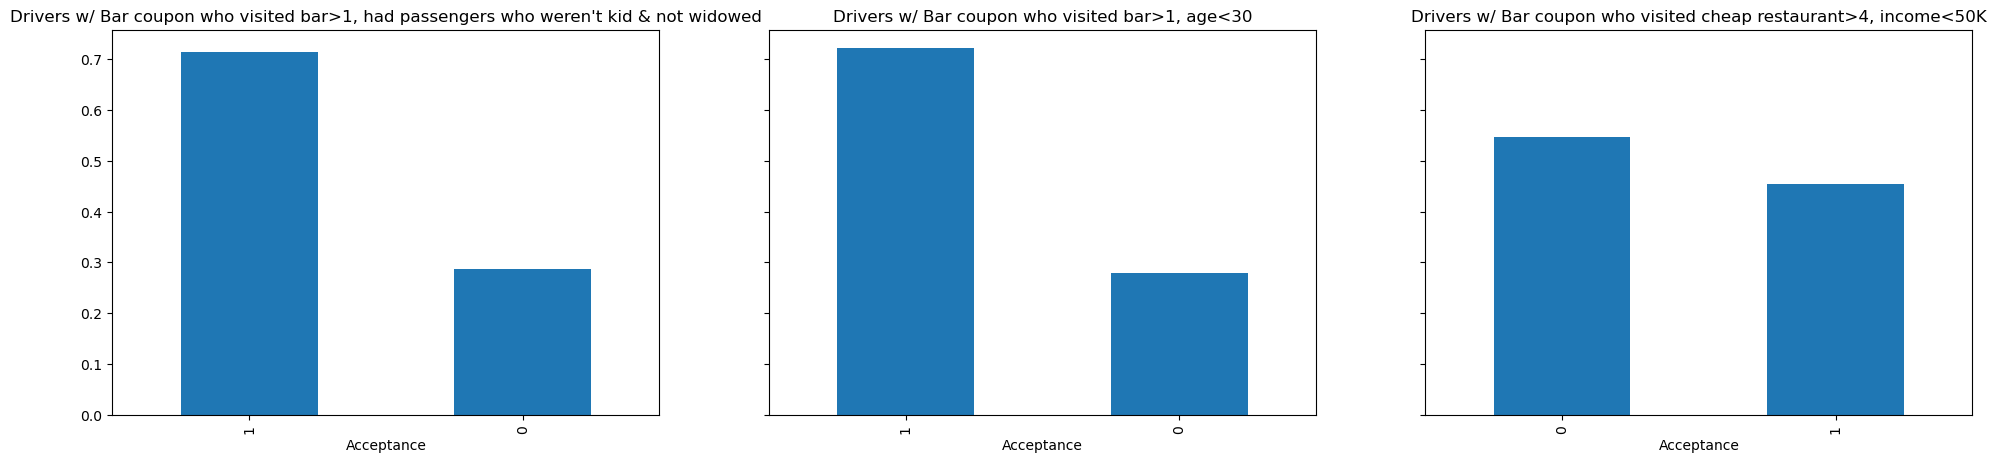

In [23]:
#Define a dataframe that filters for having drivers (with bar coupon) who:
# 1. go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

# bar visits greater than 1
bar_visit_gt_1_df = bar_df[~(bar_df['Bar'].isin(bar_values_lt_1))]
bar_visit_gt_1_df #617 rows
# passangers that are not a kid
passanger_kid = ['Kid(s)']
bar_visit_gt_1_p_not_kid_df = bar_visit_gt_1_df[~(bar_visit_gt_1_df['passanger'].isin(passanger_kid))]
bar_visit_gt_1_p_not_kid_df # 569 rows

# widowed
bar_df['maritalStatus'].value_counts()
marital_widowed = ['Widowed']
bar_visit_gt_1_p_not_kid_mar_not_wid_df = bar_visit_gt_1_p_not_kid_df[~(bar_visit_gt_1_p_not_kid_df['maritalStatus'].isin(marital_widowed))]
bar_visit_gt_1_p_not_kid_mar_not_wid_df # 569 rows (no additional rows were removed)

# 2. go to bars more than once a month and are under the age of 30 *OR*
bar_df['age'].value_counts()
under_age_30 = ['below21', '21', '26']
bar_visit_gt_1_age_lt_30_df = bar_visit_gt_1_df[(bar_visit_gt_1_df['age'].isin(under_age_30))]
bar_visit_gt_1_age_lt_30_df # 349 rows

# 3. go to cheap restaurants more than 4 times a month and income is less than 50K. 
bar_df['RestaurantLessThan20'].value_counts()
cheap_restaurant_gt_4 = ['4~8', 'gt8']
bar_rest_lt_20_visit_gt_4 = bar_df[bar_df['RestaurantLessThan20'].isin(cheap_restaurant_gt_4)] # 754 rows
bar_df['income'].value_counts()
income_lt_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
bar_rest_lt_20_visit_gt_4_inc_lt_50k_df = bar_rest_lt_20_visit_gt_4[bar_rest_lt_20_visit_gt_4['income'].isin(income_lt_50k)]
bar_rest_lt_20_visit_gt_4_inc_lt_50k_df # 344 rows

#Plot graphs
fig, ax = plt.subplots(1, 3, figsize=(24, 5), sharey=True)
bar_visit_gt_1_p_not_kid_mar_not_wid_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='Drivers w/ Bar coupon who visited bar>1, had passengers who weren\'t kid & not widowed', xlabel='Acceptance')
bar_visit_gt_1_age_lt_30_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Drivers w/ Bar coupon who visited bar>1, age<30', xlabel='Acceptance')
bar_rest_lt_20_visit_gt_4_inc_lt_50k_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[2], title='Drivers w/ Bar coupon who visited cheap restaurant>4, income<50K', xlabel='Acceptance')

plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Vinay's observations**:
Drivers who visited bar at least once were more likely to accept the Bar coupon than otherwise. This is evident from the fact that no matter what criteria you join with visiting bar more than once (Age>25, occupation, Age<30, passangers that are not kids, not widowed) -- all exhibit the behavior that Acceptance jumps to at or near 70%.
 
However Drivers who have not visited bar more than once - eg., Visited a cheaper restaurants, income<50K seem to have a drop to 50% for Acceptance of the Bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Independent analysis #1
### Simplify the criteria for Bar coupon acceptance
To further prove the point that drivers who visted bar more than once (with no other criteria attached) prove to have a higher acceptance rate of accepting a bar coupon, I have listed a comparison of 'All Drivers with Bar coupon' and 'Drivers with Bar Coupom who visited Bar more than once'.

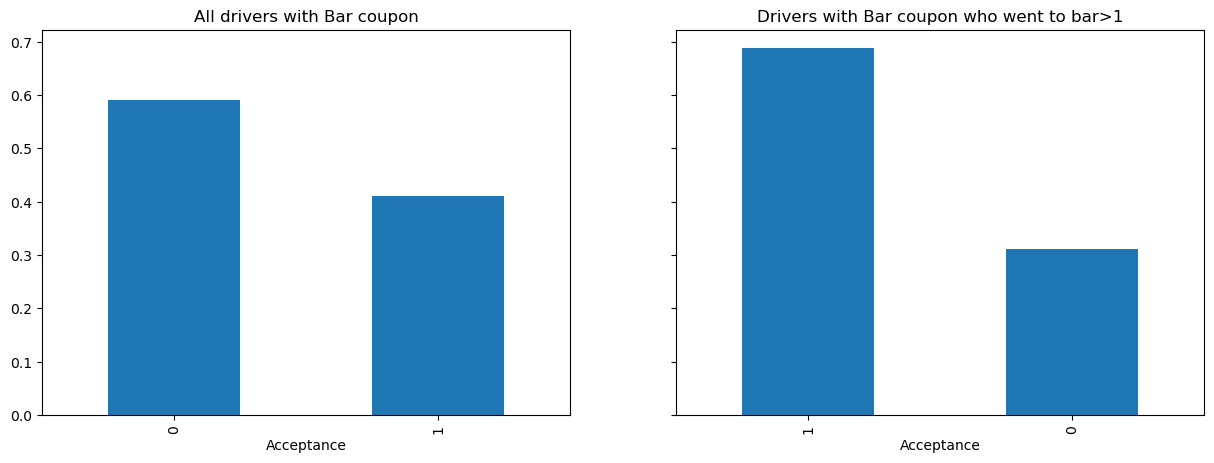

In [24]:
# bar visits greater than 1
bar_values_lt_1 = ['never', 'less1',]
bar_visit_gt_1_df = bar_df[~(bar_df['Bar'].isin(bar_values_lt_1))]

# Plot the bar plot showing subplots of bar_df and bar_visit_gt_1_age_gt_25_df
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
bar_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='All drivers with Bar coupon', xlabel='Acceptance')
bar_visit_gt_1_df['Y'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Drivers with Bar coupon who went to bar>1', xlabel='Acceptance')

plt.show()

It is evident from the above analysis that the factor of visiting bar>1 is a significant factor in determining acceptance of Bar coupon.

## Independent analysis #2
### Coffee coupons acceptance for Coffee house visitors
Similar to the bar coupon acceptance by number of visits, I am testing if similar theory would apply for coffee house visitors.

<Axes: title={'center': 'Drivers with Coffee House coupon'}, xlabel='Acceptance'>

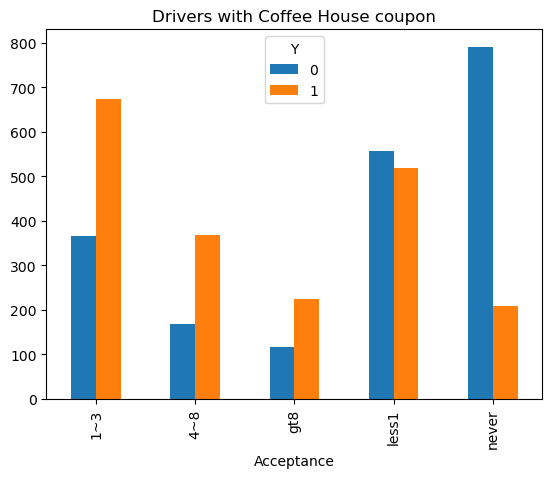

In [31]:
coffee_df = df[df['coupon'] == 'Coffee House']
coffee_group_by_df = coffee_df.groupby(['CoffeeHouse', 'Y']).size().unstack()
coffee_group_by_df.plot(kind='bar', title='Drivers with Coffee House coupon', xlabel='Acceptance')

**Vinay's analysis notes:**
The difference in acceptance of Coffee coupon seems to correlate similar to that of Bar visitors. Vistors of CoffeeHouse > 1 have a much higher acceptance than otherwise.

## Independent analysis #3
### Restaurant(<20) coupons acceptance for restaurant visitors
Similar to the bar coupon acceptance by number of visits, I am testing if similar theory would apply for coffee house visitors.

<Axes: title={'center': 'Drivers with Restaurant(<20) coupon'}, xlabel='Acceptance'>

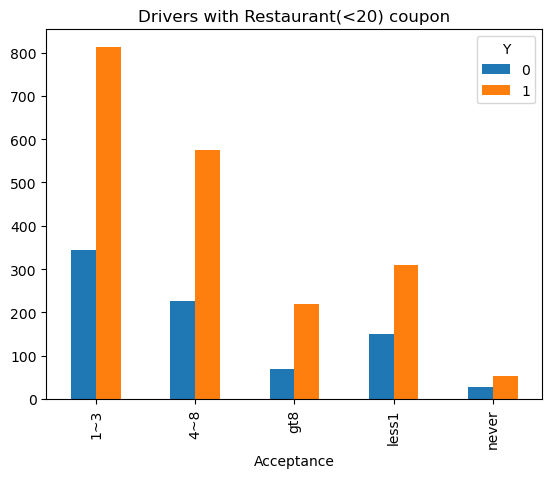

In [32]:
rest_lt_20_df = df[df['coupon'] == 'Restaurant(<20)']
coffee_group_by_df = rest_lt_20_df.groupby(['RestaurantLessThan20', 'Y']).size().unstack()
coffee_group_by_df.plot(kind='bar', title='Drivers with Restaurant(<20) coupon', xlabel='Acceptance')

**Vinay's analysis notes:**
The difference in acceptance of Restaurant(<20) coupon seems to correlate similar to that of Bar/CoffeeHouse visitors. But in this case, vistors of RestaurantLessThan20  >= 1 (not just greater than 1) have a much higher acceptance.